# Telecom Churn Case Study(Machine learning -II)   

![](img/credit-risk-analysis.jpg)

## Performend by : 
Ahmed Zeidan / Asha Sasidharan 

Date : 25 April 2022

# Introduction:

This Case Study aims to develop a prediction model to predict which customers are at high riks of churn in a leading telecome firm

#  Case Study Objectives:

1. analyse customer-level data of a leading telecom firm
2. build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Support Functions for EDA:

In [1]:
# this function will take data frame and will print the columns with null values and the % of each null values 
# this function will also return a series with the list of the cols wit null values and % of the null values
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    Missing = (df.isnull().sum()*100/len(df)).round(2)
    Missing = Missing[Missing > 0].sort_values(ascending=False)
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]
        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        #print(f'Total and Percentage of NaN:\n {missing_data}')
        return Missing
    else: 
        #print('No NaN found.')
        return Missing

In [2]:
# this function will take data frame and will return the series of cols which has null values above certain %
# this function will also return a series with the list of the cols wit null values and % of the null values
def view_columns_w_many_nans_Series(df, missing_percent):
    '''
    Checks which columns have over specified percentage of missing values
    Takes df, missing percentage
    Returns columns as a list
    '''
    mask_percent = df.isnull().mean()
    series = mask_percent[mask_percent > missing_percent]
    columns = series.index.to_list()
    Missing = (df.isnull().sum()*100/len(df)).round(2)
    Missing = Missing[Missing > 0].sort_values(ascending=False)
    #print(columns)
    return Missing

In [3]:
# this function will take data frame and will return the list of cols which has null values above certain %
# this function will also return a list of the cols wit null values and % of the null values
def view_columns_w_many_nans_List(df, missing_percent):
    '''
    Checks which columns have over specified percentage of missing values
    Takes df, missing percentage
    Returns columns as a list
    '''
    mask_percent = df.isnull().mean()
    series = mask_percent[mask_percent > missing_percent]
    columns = series.index.to_list()
    #print(columns) 
    return columns

In [4]:
# this function will take data frame and will drop  the list of cols which has null values above certain %
def drop_columns_w_many_nans(df, missing_percent):
    '''
    Takes df, missing percentage
    Drops the columns whose missing value is bigger than missing percentage
    Returns df
    '''
    
    list_of_cols = view_columns_w_many_nans_List(df, missing_percent=missing_percent)
    #print( type(list_of_cols))
   # list_of_cols = series.index.to_list()
    df1 = df.drop(columns=list_of_cols)
    print(list_of_cols)
    return df1

In [5]:
# this function will check the relationship between dependent variable and independent variables and return a Heat Map
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

In [6]:
def plot_stats(df ,feature,target,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of Loans': temp.values})
    
    # Расчет доли target=1 в категории
    cat_perc = df[[feature, target]].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by=target, ascending=False, inplace=True)
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Количество займов",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Доля проблемных', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();


In [7]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth,filename):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [8]:
def plot_categorical_independent (df ,feature,target):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    sns.countplot(x=feature, data=df[df[target] == 0],ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {feature} for Non-Churn',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    # Adding the normalized percentage 
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df[df[target] == 0]))*100), (p.get_x()+0.1, p.get_height()+50))
    sns.countplot(x=feature, data=df[df[target] == 1],ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {feature} for Churn',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    # Adding the normalized percentage 
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df[df[target] == 1]))*100), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

In [9]:
def plot_categorical_count(df ,feature):
    fig,(ax1) = plt.subplots(1,1,figsize=(15,5))
    plt.style.use('seaborn-whitegrid')
    s1 = sns.countplot( x= feature,ax=ax1, data= df, palette="rainbow", order =df[feature].value_counts().index)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {feature} ',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    for p in ax1.patches:
      ax1.annotate('{:.1f}%'.format((p.get_height()/len(df))*100), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

In [10]:
def plot_num_num_bulk(df):
   plt.style.use('ggplot')
   plt.figure(figsize = (20,5))
   sns.despine
   sns.pairplot(df)
   plt.show()

In [11]:
# function to plot numerical variables by indepent variables
def plot_numerical_independent (df ,feature,target):
  df0 = df[df[target]==0]
  df1 = df[df[target]==1]
  plt.figure(figsize = (20,5))
  sns.kdeplot(df1[feature], label = '1')
  sns.kdeplot(df0[feature], label = '0')
  plt.title('Distribution of %s by Target Value' % feature)
  plt.xlabel('%s' % feature); plt.ylabel('Density')
  plt.legend(loc='upper right')
  plt.tight_layout(h_pad = 2.5)
  plt.show()

In [12]:
def plot_categorical_num(df, categorical, numerical):
    plt.style.use('ggplot')
    sns.despine
    plt.figure(figsize = (20,10))
    sns.boxenplot(x=categorical ,y = numerical, data=df)
    plt.show()

In [13]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


## Task 1. Import Libraries / Setup Configuration:

In [14]:
#Setup Configuration - Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Importing the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling  # this lib to pefrom data profiling on the data set at hand
import scipy
!pip install imblearn
import imblearn
import scipy.stats as stats
import sklearn.linear_model as linear_model
import xgboost as xgb
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

#Setup Configuration - to view large outputs in pandas data frames 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 500)

#Understand the Version of the libs which being loaded
#print("Python: {}".format(sys.version))
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("MatplotLib: {}".format(matplotlib.__version__))
print("Seaborn: {}".format(sns.__version__))
print("Scipy: {}".format(scipy.__version__))

Pandas backend loaded 1.3.5
Numpy backend loaded 1.22.0
Pyspark backend loaded 3.2.0
Python backend loaded
You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Numpy: 1.22.0
Pandas: 1.3.5
MatplotLib: 3.5.1
Seaborn: 0.11.2
Scipy: 1.7.3


##  Task 2. Reading the data :

In [16]:
#read the csv files using the pandas lib / creating data frames to check the data
df           = pd.read_csv('telecom_churn_data.csv')

##  Task 3. Checking and Profiling the Data :

### 3.1 Checking Application Data Set

In [17]:
# Checking the sample data for the data frame
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [18]:
# Checking the shape of the  data frame
df.shape

(99999, 226)

In [19]:
# Checking the data types and the count of null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### 3.2 Checking for Null / Missinng Values

In [20]:
#Check for duplciated records in the data set
df.duplicated().sum()

0

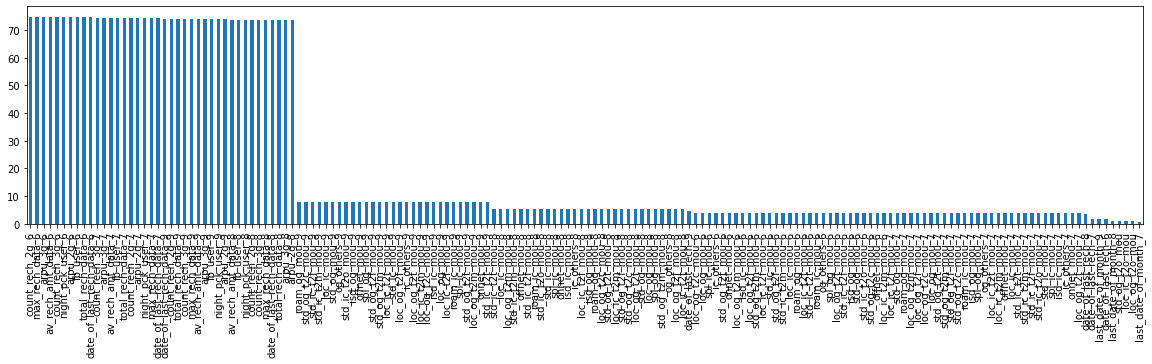

In [21]:
#Checking missing values in n data and plot the % of missing values in each column
%matplotlib inline
df_Null_Table =  view_columns_w_many_nans_Series(df, 0) 
plt.figure(figsize=(20,4))
df_Null_Table[df_Null_Table >0].plot.bar();

In [22]:
#List cols with missing values in desc order
df_Null_Table.head(200)

count_rech_2g_6             74.85
max_rech_data_6             74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
night_pck_user_6            74.85
arpu_2g_6                   74.85
fb_user_6                   74.85
total_rech_data_6           74.85
date_of_last_rech_data_6    74.85
count_rech_3g_7             74.43
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
fb_user_7                   74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
total_rech_data_9           74.08
count_rech_3g_9             74.08
max_rech_data_9             74.08
av_rech_amt_data_9          74.08
arpu_3g_9                   74.08
fb_user_9                   74.08
night_pck_user_9            74.08
arpu_2g_9     

### 3.3 Filter Data for the Top Customers

In [23]:
# before we take any actions on the data, let us filter the high value customers to focus on our analysis on this data set 
df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_data_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

# sicne we got the amount for the customers, we will not need the avg values and total amount of transactions
#hence we will be dropping those fields from the data set 
df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

# to identify the high value customers, we will need to find the avg recharge done in the first 2 months (jun, July)
# this what we call the good phase and thsi where we need to filter 70% of the customers data based on good phase
# we will also fill the empty amount by zero isntead of leaving them as NA in those columns
df_temp = (df['total_rech_amt_6'].fillna(0) 
+ df['total_rech_amt_7'].fillna(0) 
+ df['total_rech_data_amt_6'].fillna(0) 
+ df['total_rech_data_amt_7'].fillna(0))/2
# now take the 70% perentile
df70= np.percentile(df_temp, 70.0)
df70.shape

# fitler the given data set based on 70th percentile
df_hvc = df[df_temp >= df70]

print("Dimensions of the filtered dataset:",df_hvc.shape)

Dimensions of the filtered dataset: (30001, 222)


*** outcome *** : based on the getting only the high value cusomters, we managed to reduce the data size to 30,000 instead of 90,000 records at the start, now we will start to  check the missing values and handle the data 

In [24]:
#In this case, since you are working over a four-month window, the first two months are the ‘good’ phase,
#the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.
# based on the data given to us, and input on how to classify churn customer and non churn customer, by checking month 9 which
# is the fourth month in our dataaset and classify customers accordigny to churn and non chrun
df_hvc['Target'] = np.where(df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Target
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/201

In [25]:
# rename some of the cols which don't have the month number in them but instead they have the month as text 
df_hvc = df_hvc.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'sep_vbc_3g':'vbc_3g_9', 'aug_vbc_3g':'vbc_3g_8'})

In [26]:
# after driving the target variable (Churn), we will need to remove all the columns with 9 into them from the data set 
df_hvc = df_hvc.filter(regex='[^9]$', axis=1)
df_hvc.shape

(30001, 169)

### 3.5 Checking for Target Variable Imbalance 

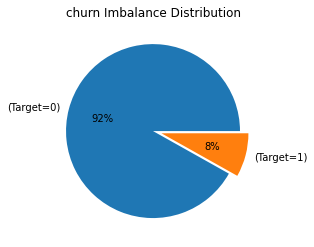

In [27]:
#chekcing if we have imbalance data set
df_hvc['Target'].value_counts(dropna=False)

#Identify if there is data imbalance in the data. Find the ratio of data imbalance.
df_hvc['Target'].value_counts(normalize=True)*100
plt.pie(df_hvc['Target'].value_counts(normalize=True)*100,labels=['(Target=0)','(Target=1)'],explode=(0,0.1),autopct='%1.f%%')
plt.title('churn Imbalance Distribution')
plt.show()

***outcome*** based on the above, we have imbalanced data set as the target variable has less than 10% of the customers with churn status

##  Task 4. Cleaning Application Data Set and Fixing Errors

### 4.1 Checking unnecessary columns which need to be dropped and null values and correct data types

In [28]:
#checking for unique values and data type in each columns for the data:
for col in df_hvc.columns:
    print(col,':', df_hvc[col].nunique(),':',  len(df_hvc[col]),':', df_hvc[col].dtype )
    print('------------------')
    print(df_hvc[col].unique())

mobile_number : 30001 : 30001 : int64
------------------
[7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689]
circle_id : 1 : 30001 : int64
------------------
[109]
loc_og_t2o_mou : 1 : 30001 : float64
------------------
[ 0. nan]
std_og_t2o_mou : 1 : 30001 : float64
------------------
[ 0. nan]
loc_ic_t2o_mou : 1 : 30001 : float64
------------------
[ 0. nan]
last_date_of_month_6 : 1 : 30001 : object
------------------
['6/30/2014']
last_date_of_month_7 : 1 : 30001 : object
------------------
['7/31/2014' nan]
last_date_of_month_8 : 1 : 30001 : object
------------------
['8/31/2014' nan]
arpu_6 : 29072 : 30001 : float64
------------------
[ 197.385 1069.18   378.721 ...  644.973  312.558  322.991]
arpu_7 : 29084 : 30001 : float64
------------------
[ 214.816 1349.85   492.223 ...  455.228  512.932  303.386]
arpu_8 : 28073 : 30001 : float64
------------------
[ 213.803 3171.48   137.362 ...  564.334  402.08   606.817]
onnet_mou_6 : 16890 : 30001 : float64
-----------

spl_og_mou_6 : 3050 : 30001 : float64
------------------
[   nan   4.5    0.   ...  26.11  11.95 385.69]
spl_og_mou_7 : 3317 : 30001 : float64
------------------
[  nan  0.    0.85 ... 20.38 47.19 14.8 ]
spl_og_mou_8 : 3193 : 30001 : float64
------------------
[  0.     6.5   10.23 ...  21.25  37.26 478.38]
og_others_6 : 841 : 30001 : float64
------------------
[       nan 0.0000e+00 1.4500e+00 2.2600e+00 2.5800e+00 1.1900e+01
 2.0000e-01 1.2900e+00 1.0000e-01 5.5000e-01 2.8000e-01 9.0000e-01
 2.2400e+00 7.9000e-01 2.6400e+00 9.5000e-01 7.0000e-01 2.1900e+00
 1.0300e+00 1.3380e+01 7.4900e+00 1.5000e-01 5.8000e-01 7.5800e+00
 3.8100e+00 4.2400e+00 1.1600e+00 4.1000e-01 3.9600e+00 9.8900e+00
 5.7900e+00 1.3300e+00 1.0800e+00 3.2400e+00 3.5900e+00 3.3800e+00
 9.3000e-01 4.2300e+00 2.2100e+00 3.5100e+00 4.9800e+00 4.1400e+00
 1.2600e+00 8.9400e+00 6.1000e-01 1.0900e+00 9.9600e+00 2.7300e+00
 7.0400e+00 4.8000e-01 1.5000e+00 2.0300e+00 2.1000e-01 1.6500e+00
 3.0300e+00 3.6400e+00 1.4100e+00

max_rech_data_8 : 48 : 30001 : float64
------------------
[2.520e+02       nan 2.300e+01 1.790e+02 4.550e+02 2.500e+01 1.540e+02
 1.700e+01 9.800e+01 4.100e+01 1.520e+02 1.980e+02 2.900e+01 1.640e+02
 2.740e+02 9.100e+01 1.750e+02 1.450e+02 4.600e+01 4.900e+01 5.600e+01
 3.300e+01 2.020e+02 4.490e+02 2.480e+02 4.800e+01 1.250e+02 5.200e+01
 6.550e+02 8.000e+00 5.000e+00 1.400e+01 6.750e+02 1.490e+02 1.770e+02
 9.510e+02 5.050e+02 8.550e+02 1.000e+00 1.300e+01 1.505e+03 7.550e+02
 2.200e+01 6.100e+01 1.500e+01 1.555e+03 1.255e+03 1.010e+02 4.950e+02]
count_rech_2g_6 : 31 : 30001 : float64
------------------
[ 0. nan  4.  2.  1.  3.  7.  8. 12.  5. 16. 11.  6. 10. 20.  9. 18. 19.
 22. 14. 17. 13. 15. 21. 25. 32. 39. 24. 28. 30. 42. 34.]
count_rech_2g_7 : 36 : 30001 : float64
------------------
[ 0. nan  2.  5. 12.  1.  7.  3.  6. 10.  8.  4. 16. 11.  9. 13. 15. 29.
 22. 14. 23. 17. 21. 19. 20. 18. 26. 27. 30. 25. 28. 31. 32. 48. 43. 35.
 24.]
count_rech_2g_8 : 34 : 30001 : float64
------

In [29]:
# in total we had 15 variables which got dropped as they are unique and will not add any value to our model 
print(df_hvc['mobile_number'].nunique())
df_hvc.info()

30001
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 169 entries, mobile_number to Target
dtypes: float64(132), int32(1), int64(27), object(9)
memory usage: 38.8+ MB


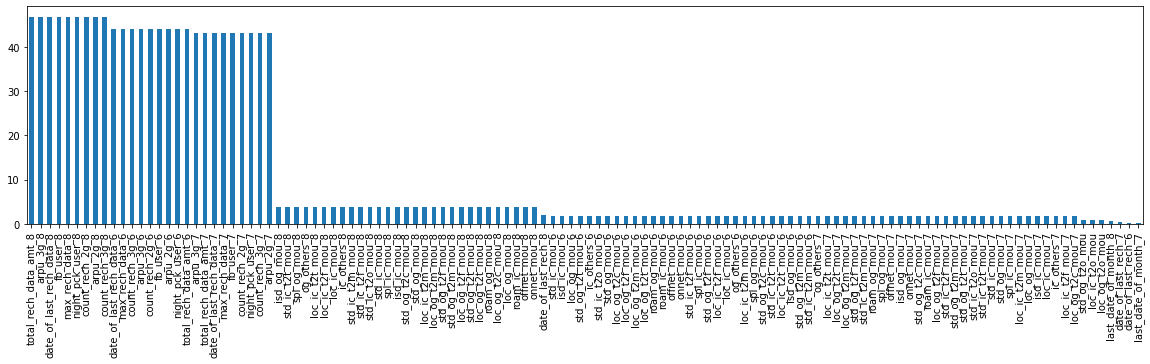

In [30]:
#Checking missing values in n data and plot the % of missing values in each column
%matplotlib inline
df_Null_Table =  view_columns_w_many_nans_Series(df_hvc, 0) 
plt.figure(figsize=(20,4))
df_Null_Table[df_Null_Table >0].plot.bar();

In [31]:
#List cols with missing values in desc order
df_Null_Table.head(200)

total_rech_data_amt_8       46.83
arpu_3g_8                   46.83
date_of_last_rech_data_8    46.83
fb_user_8                   46.83
max_rech_data_8             46.83
night_pck_user_8            46.83
count_rech_2g_8             46.83
arpu_2g_8                   46.83
count_rech_3g_8             46.83
date_of_last_rech_data_6    44.15
max_rech_data_6             44.15
count_rech_3g_6             44.15
arpu_3g_6                   44.15
count_rech_2g_6             44.15
fb_user_6                   44.15
arpu_2g_6                   44.15
night_pck_user_6            44.15
total_rech_data_amt_6       44.15
arpu_3g_7                   43.15
total_rech_data_amt_7       43.15
date_of_last_rech_data_7    43.15
max_rech_data_7             43.15
fb_user_7                   43.15
count_rech_2g_7             43.15
night_pck_user_7            43.15
count_rech_3g_7             43.15
arpu_2g_7                   43.15
isd_og_mou_8                 3.91
std_ic_t2t_mou_8             3.91
spl_og_mou_8  

In [32]:
# looking at the outcome of getting the % of null values in each col, we can decide to drop those columns which above 30%
# the rest of the columns we will handel the null values as part of the data cleaning
# we will have to keep the data for month 9 as the data for month 9
cols = df_hvc.columns
df_hvc_null = df_hvc.isnull().sum() * 100 / len(df_hvc)
df_hvc_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': df_hvc_null})

cols_to_drop = df_hvc_null_df.loc[(df_hvc_null_df["col_name"].str.contains('_9')==False) & (df_hvc_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",cols_to_drop)

# lets drop these columns
df_hvc.drop(cols_to_drop, axis=1,inplace = True)
df_hvc.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(30001, 142)

In [33]:
# dropped the values which has more than 30% of the values as null 
# based on the investigation above, we can see the following data types need to be corrected to date values: 
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
for col in cols:
    df_hvc[col] = pd.to_datetime(df_hvc[col])
# chceck if the tpes are corrected 
df_hvc[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date_of_last_rech_6   29928 non-null  datetime64[ns]
 1   date_of_last_rech_7   29903 non-null  datetime64[ns]
 2   date_of_last_rech_8   29418 non-null  datetime64[ns]
 3   last_date_of_month_6  30001 non-null  datetime64[ns]
 4   last_date_of_month_7  29974 non-null  datetime64[ns]
 5   last_date_of_month_8  29836 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 1.6 MB


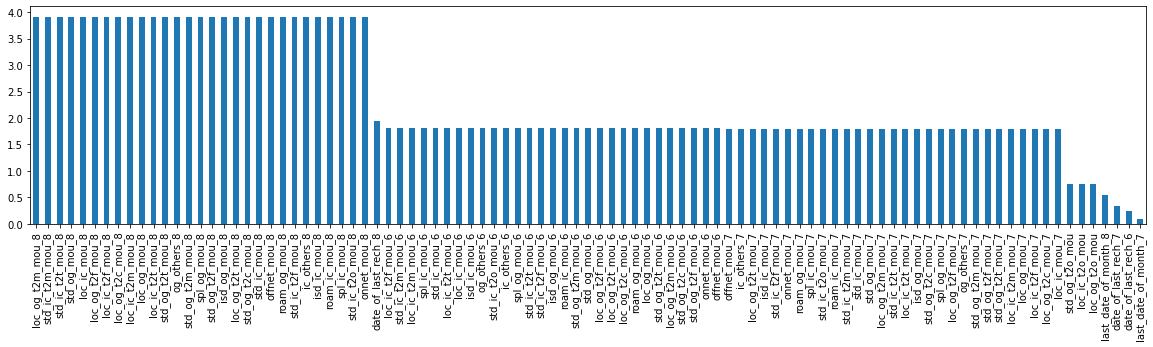

In [34]:
#Checking missing values in n data and plot the % of missing values in each column
%matplotlib inline
df_Null_Table =  view_columns_w_many_nans_Series(df_hvc, 0) 
plt.figure(figsize=(20,4))
df_Null_Table[df_Null_Table >0].plot.bar();

In [35]:
df_Null_Table.head(100)

loc_og_t2m_mou_8        3.91
std_ic_t2m_mou_8        3.91
std_ic_t2t_mou_8        3.91
std_og_mou_8            3.91
loc_ic_mou_8            3.91
loc_og_t2f_mou_8        3.91
loc_ic_t2f_mou_8        3.91
loc_og_t2c_mou_8        3.91
loc_ic_t2m_mou_8        3.91
loc_og_mou_8            3.91
loc_ic_t2t_mou_8        3.91
std_og_t2t_mou_8        3.91
og_others_8             3.91
std_og_t2m_mou_8        3.91
spl_og_mou_8            3.91
std_og_t2f_mou_8        3.91
isd_og_mou_8            3.91
loc_og_t2t_mou_8        3.91
std_og_t2c_mou_8        3.91
std_ic_mou_8            3.91
offnet_mou_8            3.91
roam_og_mou_8           3.91
std_ic_t2f_mou_8        3.91
ic_others_8             3.91
isd_ic_mou_8            3.91
roam_ic_mou_8           3.91
spl_ic_mou_8            3.91
std_ic_t2o_mou_8        3.91
onnet_mou_8             3.91
date_of_last_rech_8     1.94
loc_ic_t2f_mou_6        1.82
std_ic_t2m_mou_6        1.82
loc_ic_t2m_mou_6        1.82
spl_ic_mou_6            1.82
std_ic_mou_6  

In [36]:
# since the other columes has very small values of NA, we can safely drop all those columns 
df_hvc.dropna(inplace=True)
df_Null_Table =  view_columns_w_many_nans_Series(df_hvc, 0) 
df_Null_Table.head(100)

Series([], dtype: float64)

***outcome*** Based on the above results - all the null values has been fixed and no further nulls

### 4.2 Driving New Variables to help in the analysis

In [37]:
# lets now conevrt AON in months
df_hvc['aon_mon'] = df_hvc['aon']/30
df_hvc.drop('aon', axis=1, inplace=True)
df_hvc['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Tenure Graph')

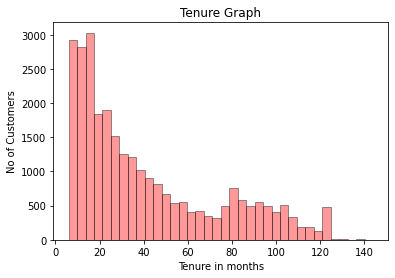

In [38]:
ax = sns.distplot(df_hvc['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
# below graph simply shows the tenure of the customers

In [39]:
#Create the tenure binning value to enable us to segment the customers accordingly, the below ranges based on the above 
#analysis of the histogram
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_hvc['tenure_range'] = pd.cut(df_hvc['aon_mon'], tn_range, labels=tn_label)
df_hvc['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

After performing mutiple operation, we are ready now to move to the data analysis phase

##  Task 5. Data Analysis

### 5.1 Checking for Correlation

#### 5.1.1 Checking for Correlation Between independent variables and the dependent variable

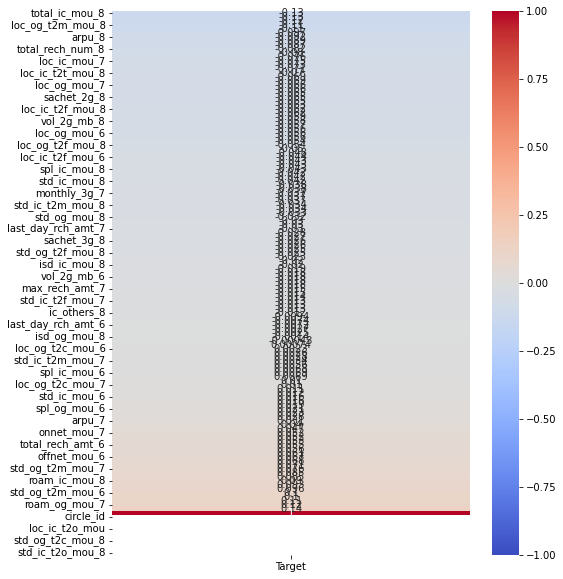

In [40]:
# Plot a visual rep for the correlation table as below
heatmap_numeric_w_dependent_variable(df_hvc, 'Target');

#### 5.1.2 Checking for Correlation Between independent variables and the independent variable

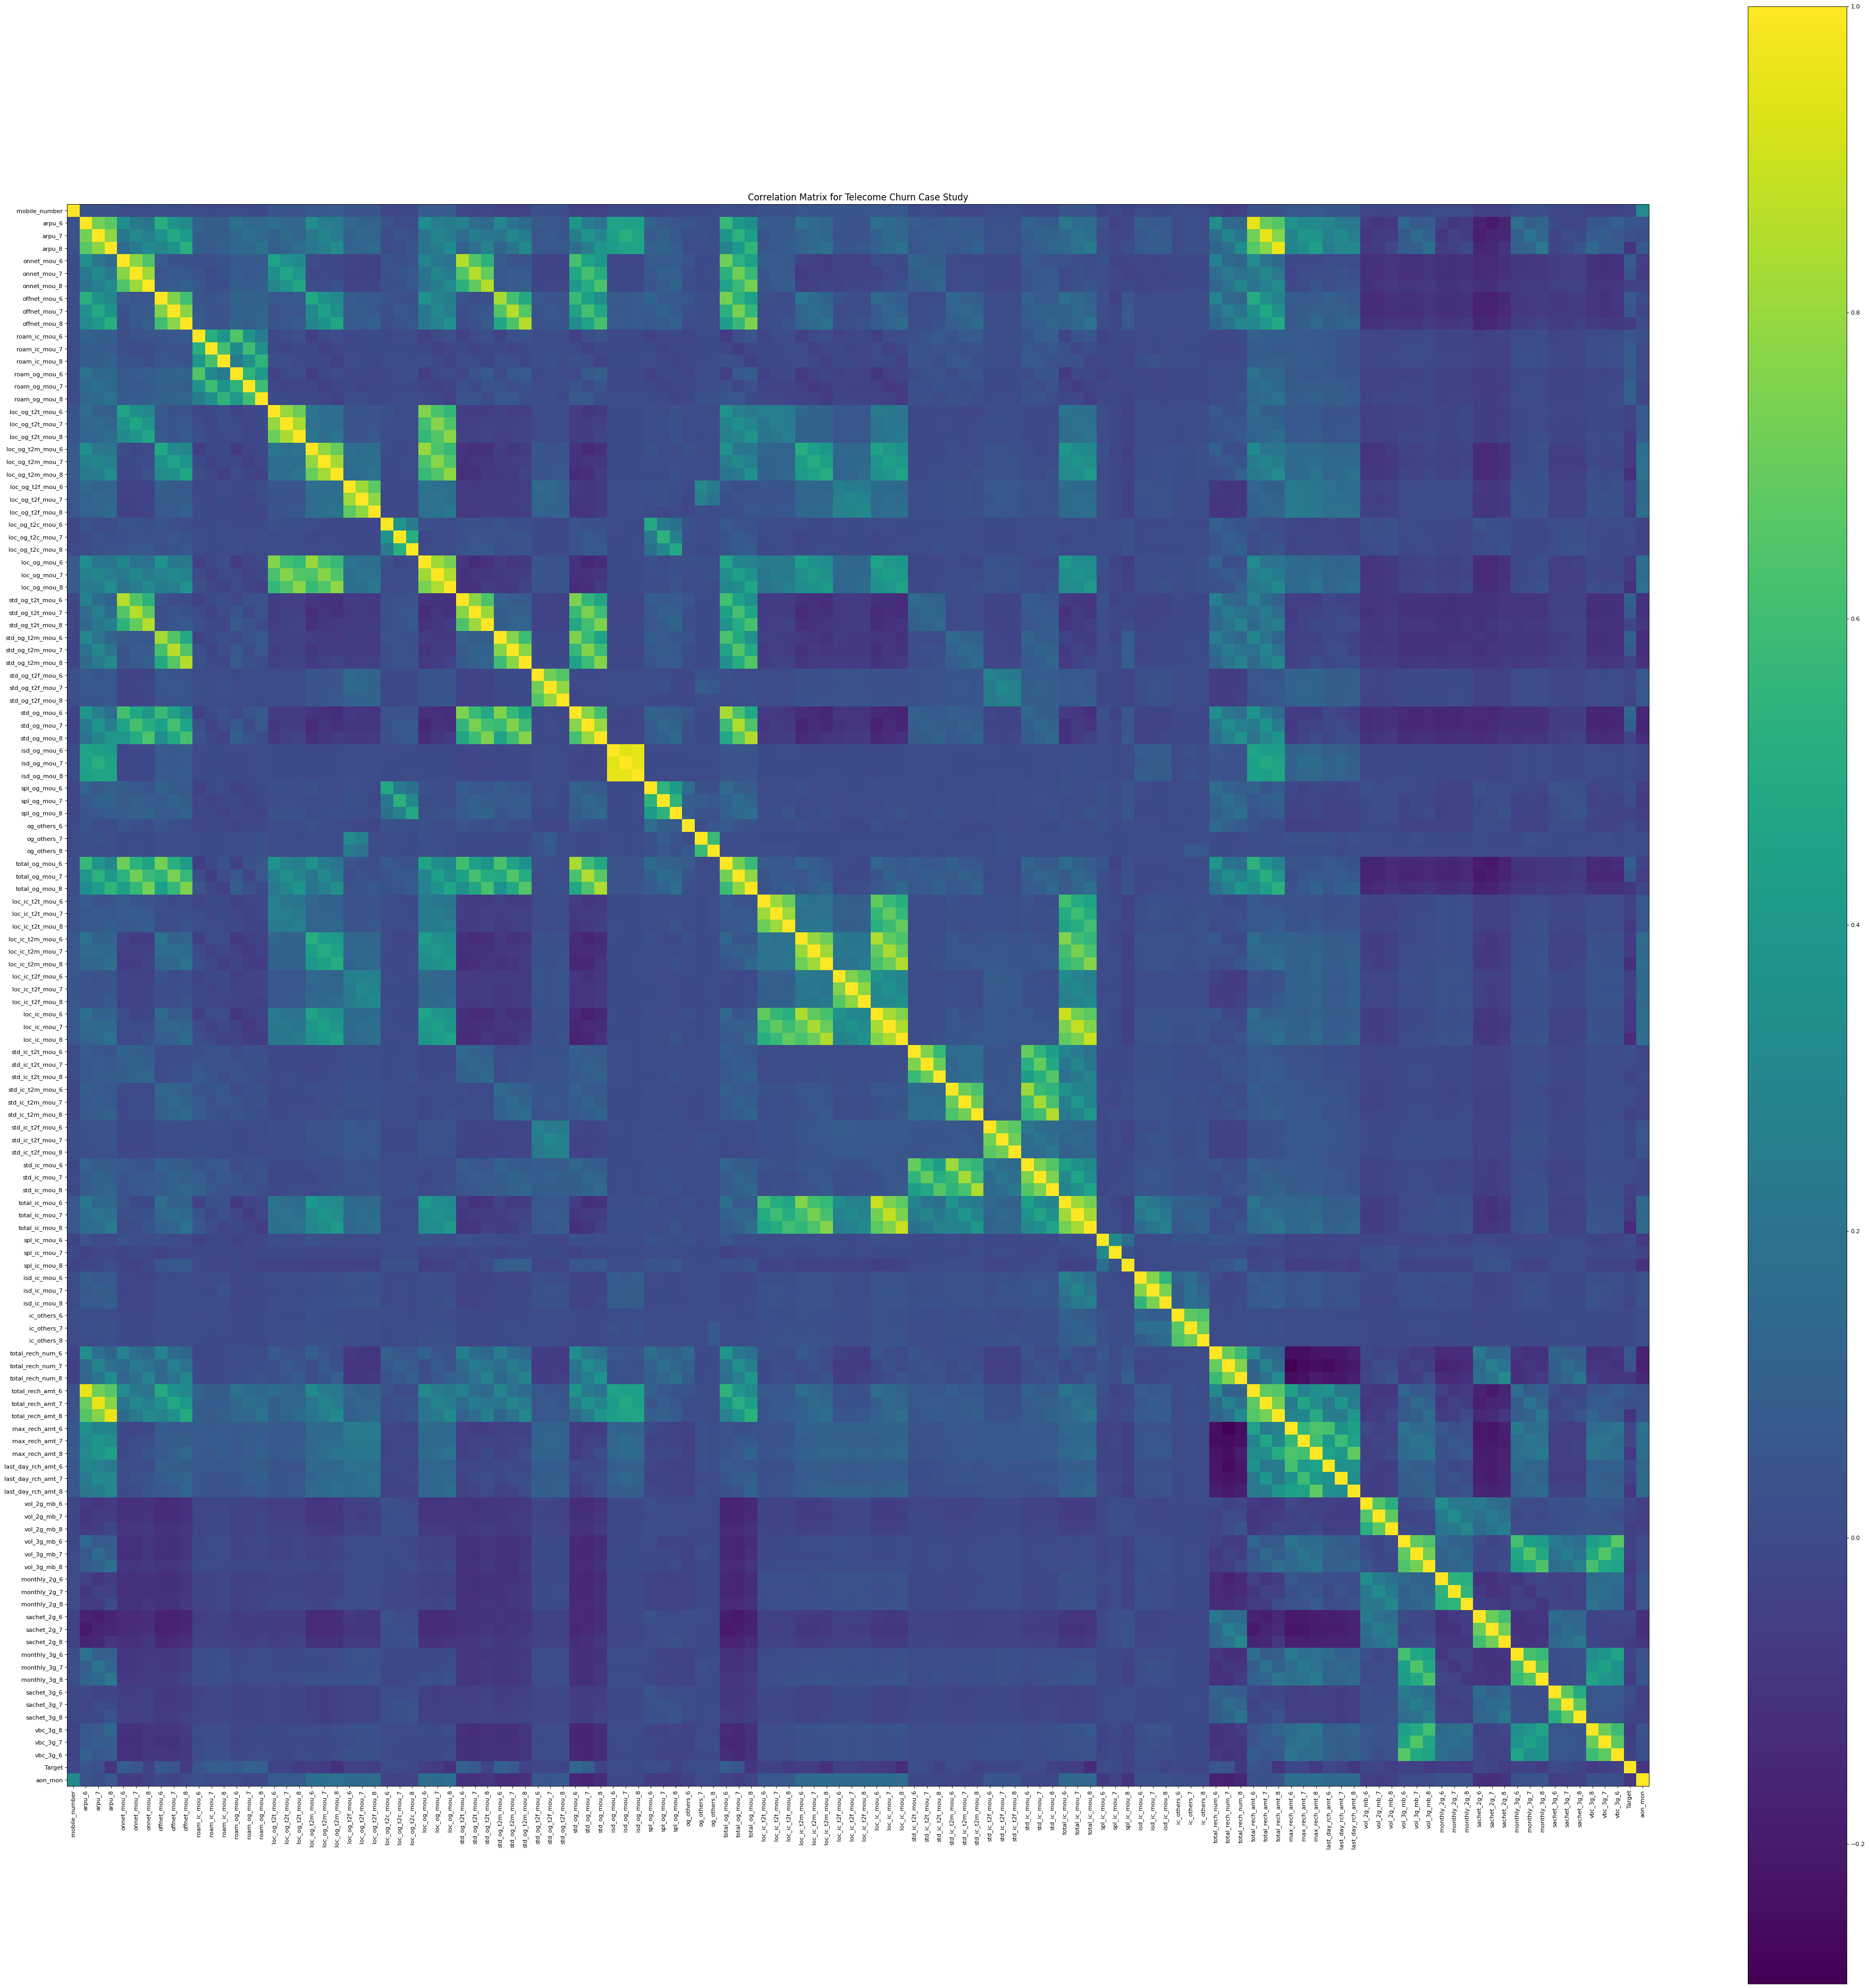

In [41]:
plotCorrelationMatrix(df_hvc, 60, 'Telecome Churn Case Study')

***outcome*** from the graph we cannot identify anything, so we will use the absolute method to get the highly coorelated values 

In [42]:
# let us check the values with high coorelation, i.e. more than 70% 
cor = df_hvc.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.70) | (cor < -0.70)].sort_values()

loc_ic_mou_7      loc_ic_t2m_mou_8    0.701707
total_rech_amt_7  arpu_6              0.705969
std_ic_t2m_mou_7  std_ic_t2m_mou_6    0.706220
vbc_3g_7          vbc_3g_8            0.706559
loc_og_t2t_mou_8  loc_og_t2t_mou_6    0.708473
loc_ic_mou_8      loc_ic_t2m_mou_7    0.709144
std_ic_t2t_mou_8  std_ic_t2t_mou_7    0.709638
loc_ic_t2t_mou_8  loc_ic_t2t_mou_6    0.710372
sachet_2g_7       sachet_2g_6         0.711289
loc_ic_t2m_mou_8  loc_ic_t2m_mou_6    0.713029
total_og_mou_6    onnet_mou_6         0.714861
total_og_mou_7    onnet_mou_7         0.716328
ic_others_8       ic_others_7         0.716399
std_ic_t2f_mou_8  std_ic_t2f_mou_7    0.718723
std_ic_t2m_mou_8  std_ic_t2m_mou_7    0.718768
std_og_t2f_mou_7  std_og_t2f_mou_6    0.719148
std_ic_t2f_mou_7  std_ic_t2f_mou_6    0.722724
total_ic_mou_7    loc_ic_mou_6        0.725482
total_rech_amt_6  arpu_7              0.725830
sachet_2g_8       sachet_2g_7         0.727024
total_og_mou_8    onnet_mou_8         0.728426
arpu_7       

In [43]:
# we will drop the columns with high correlation (+/- 70%)
df_hvc.drop(['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

                 
df_hvc.shape

(28163, 101)

In [44]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_hvc_numerics = df_hvc.select_dtypes(include=numerics)
col_list = df_hvc_numerics.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_hvc[avg_col_name] = (df_hvc[col_6]  + df_hvc[col_7])/ 2
    
df_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Columns: 131 entries, mobile_number to avg_vbc_3g_av67
dtypes: category(1), datetime64[ns](3), float64(103), int32(1), int64(23)
memory usage: 28.1 MB


In [45]:
# we dont need columns from which we have derived new features
print ("dimension of the updated dataset after creating dervied features:",df_hvc.shape)
col_to_drop = df_hvc_numerics.filter(regex='_6|_7').columns
df_hvc.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping un-necessary columns:",df_hvc.shape)

dimension of the updated dataset after creating dervied features: (28163, 131)
dimension of the dataset after dropping un-necessary columns: (28163, 71)


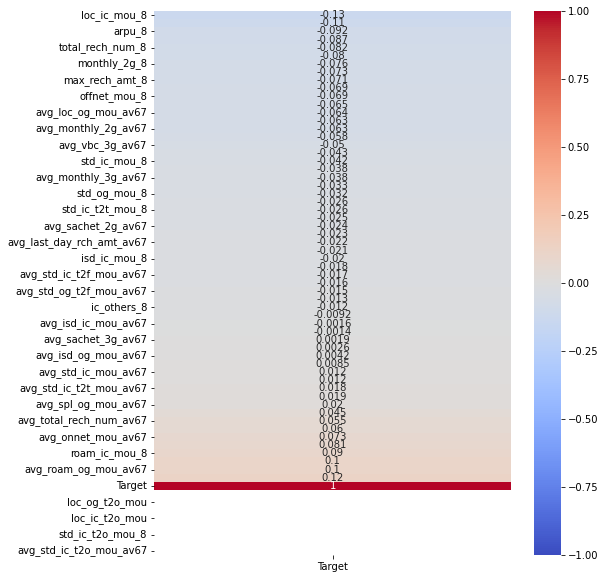

In [46]:
heatmap_numeric_w_dependent_variable(df_hvc, 'Target');

### 5.2 Univariate Analysis

#### 5.2.1 Univariate Analysis of Categorical Variables

<Figure size 1440x720 with 0 Axes>

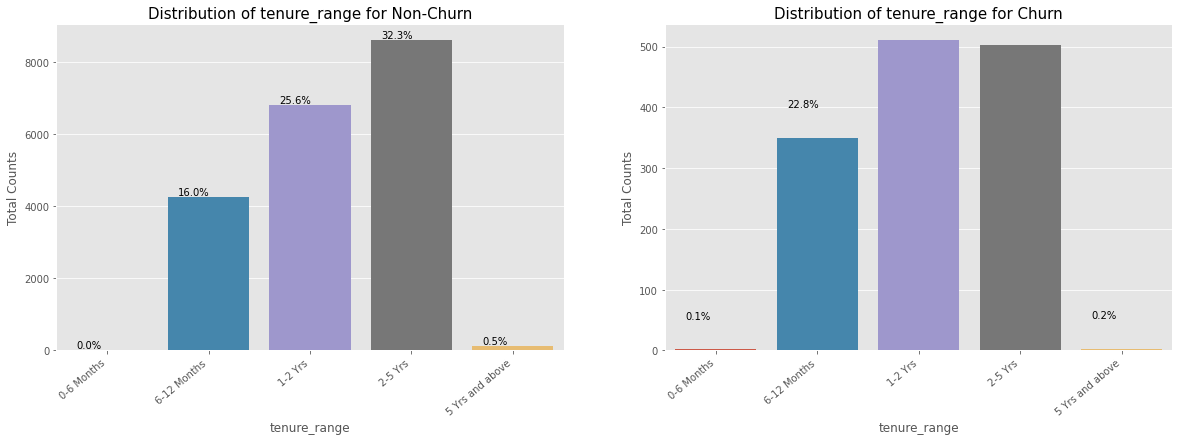

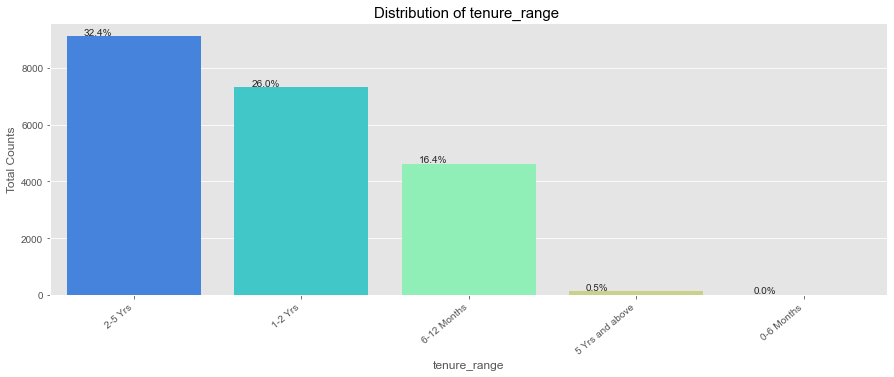

In [47]:
# Plot all the object and Category values to check for outilers for application data
df_hvc_Data_object = df_hvc.select_dtypes('object').columns
df_hvc_Data_category = df_hvc.select_dtypes('category').columns

plt.figure(figsize=(20,10))
for col in df_hvc_Data_object:
 plot_categorical_independent (df_hvc ,col,'Target')
 plot_categorical_count(df_hvc ,col)



for col in df_hvc_Data_category:
 plot_categorical_independent (df_hvc ,col,'Target')
 plot_categorical_count(df_hvc ,col)

**Observations from the Univariate Analysis of Numerical  variables for Data**
1. most of the customers are between 2-5 years period
2. customers with tenure of less than 2 years, tend to churn more than the customers with above 2 years 

##  Task 6.  Modeling

During the Modeling process, we will try different ML techniques to find which one produce the best results, we plan to use the following: 
1. Linear SVM
2. Logistic regression model
3. PCA Using Logistic Regression Model 
4. Random Forest model

### 6.1 linear SVM

### 6.1.1 Data Prepreation 

In [50]:
# we will create a new dataset for model building
df = df_hvc[:].copy()
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,Target,aon_mon,tenure_range,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_t2c_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_t2o_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
7,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,0.0,77.84,10.01,6.50,0.0,188.04,30.39,22.21,0.0,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,26.733333,2-5 Yrs,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,0.0,68.000,0.090,2.25,0.0,391.555,24.360,43.215,0.0,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,0.0,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.0,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,10.500000,6-12 Months,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,0.0,136.870,0.000,0.00,0.0,52.630,0.290,0.000,0.0,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405
21,7002124215,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,0.0,938.79,0.00,0.00,0.0,159.11,0.18,0.00,0.0,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,24.000000,1-2 Yrs,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,0.0,848.990,0.000,0.00,0.0,106.505,10.020,0.000,0.0,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,0.0,39.61,0.00,17.71,0.0,224.21,13.38,0.00,0.0,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,20.133333,1-2 Yrs,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,0.0,4.355,0.005,0.05,0.0,145.520,0.255,0.000,0.0,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930
33,7000149764,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.0,0.00,0.00,0.56,0.0,40.54,0.05,0.13,0.0,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,0,44.266667,2-5 Yrs,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.00,0.0,2.180,1.455,0.595,0.0,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,2210.750


In [51]:

#drop columns
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
# lets drop tenure range because it is highly correlated with AON MONTH column
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)
df.drop(['last_date_of_month_7','last_date_of_month_8','last_date_of_month_6'], axis=1, inplace=True)
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,Target,aon_mon,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_t2c_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_t2o_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
7,109,0.0,0.0,0.0,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,0.0,77.84,10.01,6.50,0.0,188.04,30.39,22.21,0.0,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,26.733333,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,0.0,68.000,0.090,2.25,0.0,391.555,24.360,43.215,0.0,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,109,0.0,0.0,0.0,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,0.0,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.0,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,10.500000,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,0.0,136.870,0.000,0.00,0.0,52.630,0.290,0.000,0.0,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405
21,109,0.0,0.0,0.0,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,0.0,938.79,0.00,0.00,0.0,159.11,0.18,0.00,0.0,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,24.000000,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,0.0,848.990,0.000,0.00,0.0,106.505,10.020,0.000,0.0,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000
23,109,0.0,0.0,0.0,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,0.0,39.61,0.00,17.71,0.0,224.21,13.38,0.00,0.0,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,20.133333,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,0.0,4.355,0.005,0.05,0.0,145.520,0.255,0.000,0.0,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930
33,109,0.0,0.0,0.0,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.0,0.00,0.00,0.56,0.0,40.54,0.05,0.13,0.0,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,0,44.266667,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.00,0.0,2.180,1.455,0.595,0.0,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,2210.750


In [52]:
# lets create X & y dataset for model building
X = df.drop(['Target'], axis=1)
y = df['Target']

df.drop('Target', axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   circle_id                  28163 non-null  int64  
 1   loc_og_t2o_mou             28163 non-null  float64
 2   std_og_t2o_mou             28163 non-null  float64
 3   loc_ic_t2o_mou             28163 non-null  float64
 4   arpu_8                     28163 non-null  float64
 5   onnet_mou_8                28163 non-null  float64
 6   offnet_mou_8               28163 non-null  float64
 7   roam_ic_mou_8              28163 non-null  float64
 8   roam_og_mou_8              28163 non-null  float64
 9   loc_og_t2c_mou_8           28163 non-null  float64
 10  loc_og_mou_8               28163 non-null  float64
 11  std_og_t2f_mou_8           28163 non-null  float64
 12  std_og_t2c_mou_8           28163 non-null  float64
 13  std_og_mou_8               28163 non-null  flo

### 6.1.2 Data Splitting and scaling

In [53]:
#scaling the data using standard scaller 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [54]:
# perform train and test split of the data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19714, 65)
Dimension of X_test: (8449, 65)


In [60]:
# as we discussed before during the EDA stage, we will have to handel the Imbalance data set we have for Target variable
from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=0)
X_tr,y_tr = sm.fit_resample(X_train,y_train)


In [63]:
# let us check if the sampling works fine and now we have balanced data set :
print(((y_tr==1).sum()/len(y_tr))*100 )
print(((y_tr==0).sum()/len(y_tr))*100)

50.0
50.0


In [65]:
# Model Building
# SVM (lets start with linear SVM)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)



0.9474525119829575

In [72]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

#Lets do RFE with 15 components
rfe= RFE(lr,step = 15)
rfe = rfe.fit(X_tr,y_tr)

In [73]:
rfe_features = list(df.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'avg_roam_og_mou_av67', 'avg_loc_og_mou_av67', 'avg_std_og_mou_av67', 'avg_og_others_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67', 'avg_std_ic_mou_av67', 'avg_ic_others_av67', 'avg_total_rech_num_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'avg_monthly_3g_av67', 'avg_sachet_3g_av67']


In [74]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

##### Model Results : linear SVM gave us accuracy of 94% on test data

### 6.2 Logisctic Regression model

In [75]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [76]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[4238 1099]
 [  52  244]]
Accuracy on the test dataset: 0.7956683827445411


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      5337
           1       0.18      0.82      0.30       296

    accuracy                           0.80      5633
   macro avg       0.58      0.81      0.59      5633
weighted avg       0.95      0.80      0.85      5633



##### Model Results : Logisctic Regression gave us accuracy of 80% on test data but with High false positve rate

### 6.3 PCA Model Using Logistic Regression

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=0)
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37270, 65)
(37270,)


In [81]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_tr)

PCA(random_state=100)

In [82]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(37270, 65)
(8449, 65)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[6363 1627]
 [ 111  348]]
Accuracy of the logistic regression model with PCA:  0.7942951828618772


In [85]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,-2.107606e-19,1.423675e-19,-3.966097e-19,circle_id
1,-2.775558e-17,-4.163336e-17,1.665335e-16,loc_og_t2o_mou
2,3.330669e-16,-1.110223e-16,-1.110223e-16,std_og_t2o_mou
3,2.220446e-16,0.000000e+00,0.000000e+00,loc_ic_t2o_mou
4,1.632778e-01,2.094996e-01,1.840267e-01,arpu_8
5,6.644397e-02,2.648629e-01,-2.756536e-02,onnet_mou_8
6,9.320949e-02,2.171170e-01,7.395057e-02,offnet_mou_8
7,3.698229e-01,-1.193011e-01,-1.228477e-01,roam_ic_mou_8
8,4.115094e-01,-5.557662e-02,-1.153279e-01,roam_og_mou_8
9,-2.770425e-03,8.692229e-02,-1.171629e-02,loc_og_t2c_mou_8


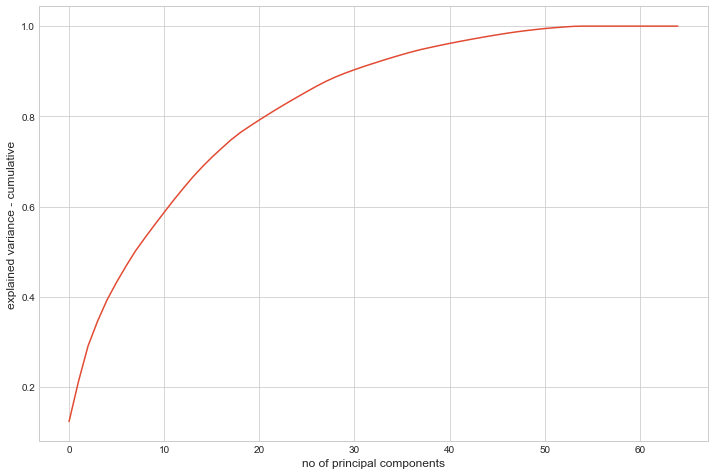

In [86]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [87]:
# PCA with 33 components
pca_33 = PCA(n_components=33)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(37270, 33)
(8449, 33)


In [88]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_33, y_tr)

# Predicted probabilities
y_pred33 = lr_pca1.predict(df_test_pca_33)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",accuracy_score(y_test,y_pred33))

Accuracy with 33 PCAs:  0.7929932536394839


In [89]:
print(confusion_matrix(y_test,y_pred33))

[[6353 1637]
 [ 112  347]]


##### Model Results : PCA Logisctic Regression gave us accuracy of 80% on test data using only 33 features which explain 90% of variance

### 6.4 Random Forest

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=0)
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37270, 65)
(37270,)


In [110]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1, max_depth=10)

In [111]:
#PCA withe default parameters
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [112]:
# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9492247603266659


In [113]:
print(classification_report(y_test,prediction_test))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7990
           1       0.59      0.21      0.31       459

    accuracy                           0.95      8449
   macro avg       0.77      0.60      0.64      8449
weighted avg       0.94      0.95      0.94      8449



In [114]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7922   68]
 [ 361   98]]


In [115]:
model_rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.41449618e-02, 1.95130385e-02, 2.06599158e-02, 6.75530410e-02,
       5.59360466e-02, 6.14571749e-03, 5.89012738e-02, 8.55852090e-04,
       0.00000000e+00, 2.44335384e-02, 3.91339846e-03, 7.41795618e-03,
       8.37814084e-05, 9.73578012e-02, 1.05515418e-02, 4.59014186e-03,
       0.00000000e+00, 3.24627856e-02, 2.06930112e-03, 2.89105165e-03,
       4.21133005e-03, 1.51496004e-02, 3.46730639e-02, 3.40261291e-02,
       2.19660793e-02, 8.96741664e-04, 3.23869382e-03, 1.83800005e-03,
       1.31844090e-03, 1.10832053e-02, 1.92932185e-02, 2.35118825e-02,
       2.28899677e-02, 2.33062765e-02, 2.48349004e-02, 2.84473063e-02,
       8.52513676e-03, 1.93934025e-02, 4.16386565e-03, 0.00000000e+00,
       3.16527375e-02, 7.09667255e-03, 1.36734739e-02, 8.52339389e-03,
       2.37497379e-02, 1.48572068e-02, 6.57176968e-03, 0.00000000e+00,
       1.72453758e-02, 7.17816526e-03, 7.51776379e-03, 7.07913398e-03,
      

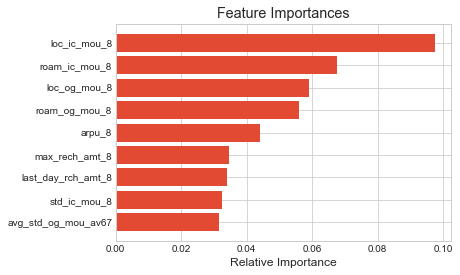

In [116]:
# Lets graph with top 10 features
features = df.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-9:]

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

#### we will perform additioanl finetuning to get the optimal estimators

In [119]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
print(X_tr.shape)
print(y_tr.shape)

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_tr, y_tr)

(37270, 65)
(37270,)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.004123,0.294348,0.083895,0.026439,2,{'max_depth': 2},0.825329,0.861953,0.847062,0.838342,0.845855,0.843708,0.011961,4,0.850248,0.845989,0.845083,0.839985,0.837604,0.843782,0.004494
1,7.139721,0.651761,0.088214,0.017983,7,{'max_depth': 7},0.881540,0.910250,0.900188,0.900590,0.905017,0.899517,0.009698,3,0.913134,0.906292,0.905789,0.907566,0.907399,0.908036,0.002635
2,11.271024,1.139623,0.128150,0.020932,12,{'max_depth': 12},0.930910,0.963375,0.958680,0.957472,0.955863,0.953260,0.011452,2,0.978703,0.974745,0.974611,0.974946,0.975047,0.975610,0.001554
3,13.889729,0.986246,0.164379,0.030518,17,{'max_depth': 17},0.945667,0.975315,0.968473,0.969278,0.969547,0.965656,0.010287,1,0.990944,0.990005,0.990609,0.990341,0.990475,0.990475,0.000309


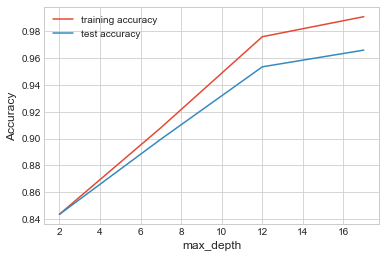

In [121]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Outcome*** based on the above, we can see that the max depth we have is around 12 

In [122]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

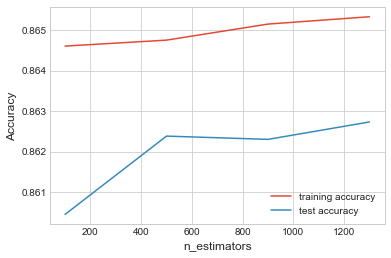

In [123]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Outcome*** based on the above, we can conclude that the best value for the n_estimators will be 500

In [124]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

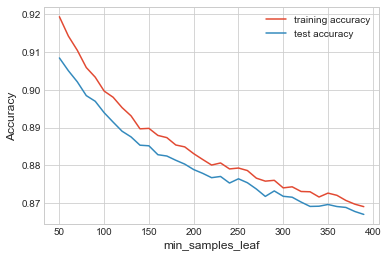

In [125]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***outcome*** based on the above we can seelct a min samplea leave between 200 to 500

In [126]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [127]:
# fit the grid search with the data
grid_search.fit(X_tr, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy is 0.8910385549572185 using {'max_depth': 10, 'max_features': 25, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 700}


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [129]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5333
           1       0.64      0.15      0.24       300

    accuracy                           0.95      5633
   macro avg       0.80      0.57      0.61      5633
weighted avg       0.94      0.95      0.94      5633

[[5308   25]
 [ 256   44]]


<AxesSubplot:>

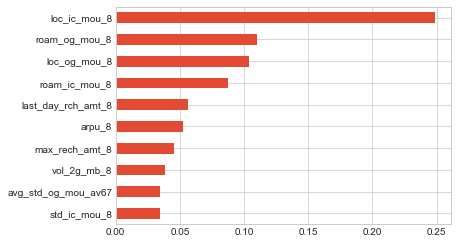

In [130]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [131]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9501153914432807


##### Model Results : Random Forest gave us accuracy of 95% on test data showing the best results among all pervious models 

# 7. Summary and Recommendation

## 7.1 Summary of Model buliding approach

1. We have evaluated serveral models to identify which is the best model which would serve our use case 
2. the best model which resulted in the best outcome were Random Forecest followed by SV Liner Model
3. SV Liner Model showed the following: Accuracy of 94%
4. Logistisc Regression showed the following Accuracy of 80% with high false positive which not good for use case
5. PCA Logisctic Regression gave us accuracy of 80% on test data using only 33 features which explain 90% of variance
6. Random Forest gave us accuracy of 95% on test data showing the best results among all pervious models
7. During the model building we had to address the imbalance data set and we used teh SMOTE lib to get sampling which gave us balanced sample data set

## 7.2 Business Recommendations 

The following are the most important factors which impact the rate of customer chrun: 
1. Total incoming mintues of usage in the Aug month 
2. Total outgoing mintues of usage in the Aug month  
3. Average recharge amount and max recharge amount are strong predictors 
4. Last recharge date for month of Aug customers who charge very late in month, are most likely to chrun 
5. STD ouoging calls and STD incoming calls, customers with lower value in month of Aug will have higher chance to Churn 
6. company shall focus on the above indicator and watch for any decline in the trend of those indicator and focus on those customers with less usage compared to pervious month to prevent / reduce the Churn
7. Less number of high value customers are churning but for last 4 months, we see very less amount of such customers joined the telecome company customer base, this is an area marketing team shall focus on
